# Objective : Telecom Customer Churn Prediction 
# EDA - Python
# Insights - Patterns
# Classification

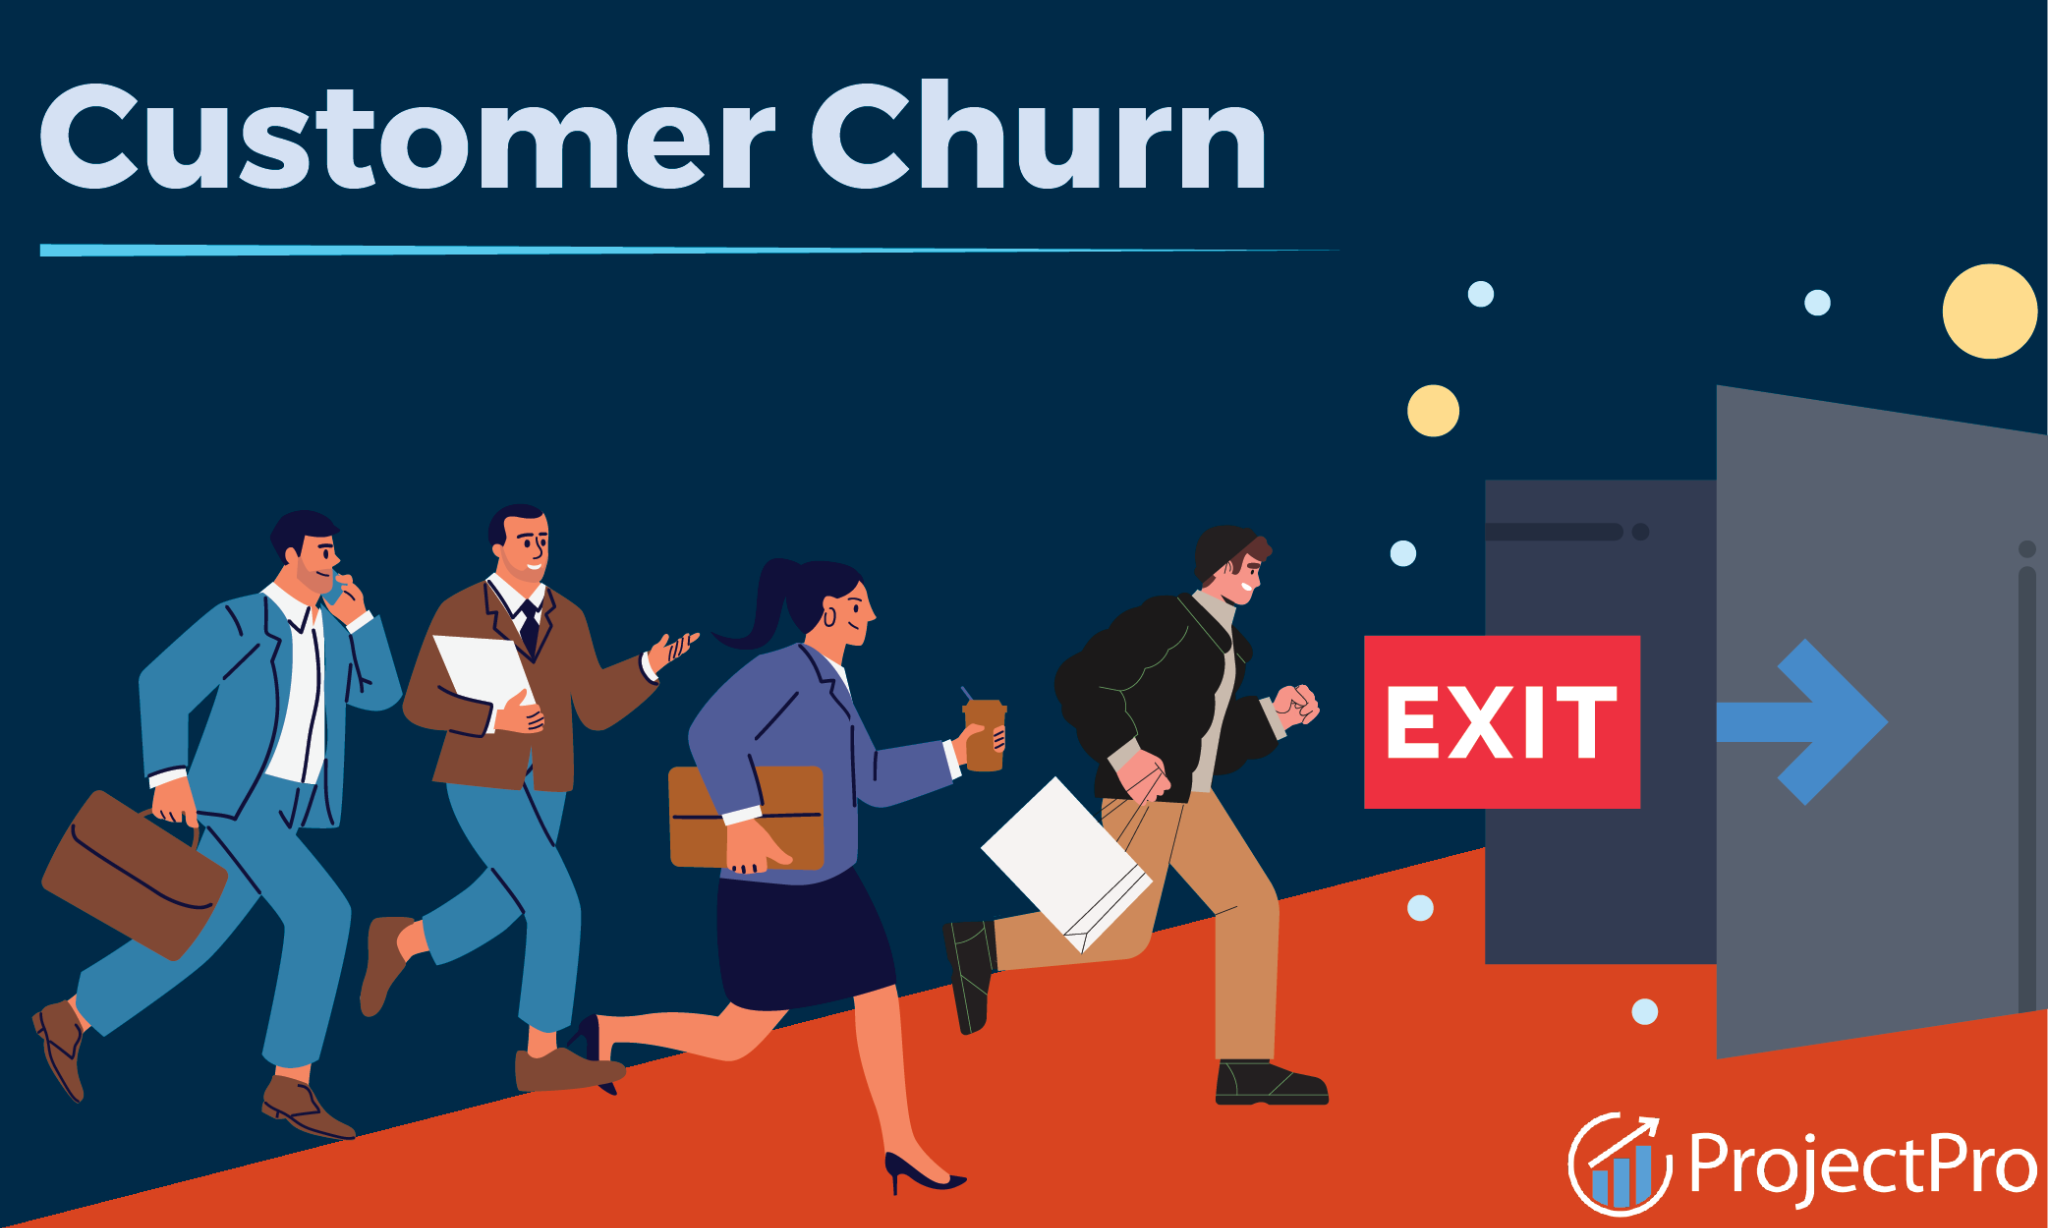

# 1. Load Python Modules

In [60]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score,ConfusionMatrixDisplay,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# 2. Read the Dataset from CSV file  - Using Pandas

In [61]:
df=pd.read_csv("telecom-churn-preprocessed_data.csv")
df

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,42.39,0,...,1,1,1,65.60,593.30,0.0,0,381.51,974.81,1
1,1,50,0,0,33.645672,-117.922613,0,4,33.65,0,...,0,1,0,73.90,280.85,0.0,0,134.60,415.45,0
2,1,78,1,0,38.014457,-122.115432,1,13,27.82,0,...,0,1,0,98.00,1237.85,0.0,0,361.66,1599.51,0
3,0,75,1,0,34.227846,-119.079903,3,3,7.38,0,...,0,1,1,83.90,267.40,0.0,0,22.14,289.54,0
4,0,23,0,3,37.581496,-119.972762,0,9,16.77,0,...,0,1,1,69.40,571.45,0.0,0,150.93,722.38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,0,53,0,0,36.807595,-118.901544,0,1,42.09,0,...,0,1,1,70.15,70.15,0.0,0,42.09,112.24,0
4389,0,20,0,0,32.759327,-116.997260,0,13,46.68,0,...,1,0,1,55.15,742.90,0.0,0,606.84,1349.74,1
4390,1,40,1,0,37.734971,-120.954271,1,22,16.20,1,...,0,1,0,85.10,1873.70,0.0,0,356.40,2230.10,0
4391,1,22,0,0,39.108252,-123.645121,0,2,18.62,0,...,0,1,1,50.30,92.75,0.0,0,37.24,129.99,1


In [62]:
df.shape

(4393, 30)

# 3. Train Test Split

In [63]:
X = df.drop('Customer Status', axis=1)
y = df['Customer Status']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(3514, 29)
(879, 29)
(3514,)
(879,)


# 4. With out hyperparameter tuning -ML

In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

def metric_calssifcation(y_pred, y_test):
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)

    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)

    cmt = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=[False, True])
    disp.plot()
    plt.grid(False)
    plt.show()

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Negative:", tn)
    print("False Positive:", fp)
    print("False Negative:", fn)
    print("True Positive:", tp)
    
    return acc, f1, precision, recall


## 4.1 Decision Tree Classifier

In [66]:
result_dict = {}

Model-Decion Tree
train score: 1.0
test score: 0.7690557451649602
Accuracy: 76.91
F1 Score: 0.83
Precision: 0.85
Recall: 0.81


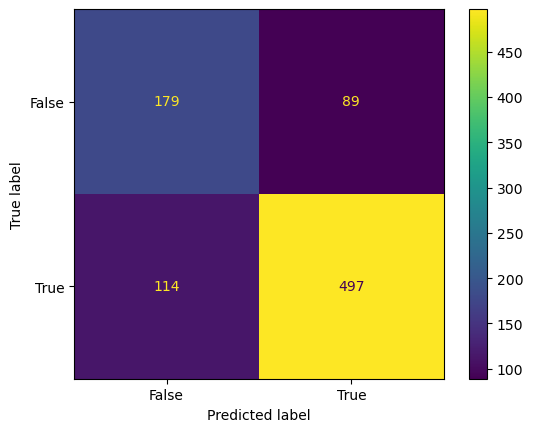

True Negative: 179
False Positive: 89
False Negative: 114
True Positive: 497


{'dt': (76.91, 0.83, 0.85, 0.81)}

In [67]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
print("Model-Decion Tree")

accuracy=dt_clf.score(X_train, y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, y_test)
print(f"test score: {accuracy}")

y_pred_dt=dt_clf.predict(X_test)
result_dict["dt"]=metric_calssifcation(y_pred_dt,y_test)
result_dict


## 4.2 Logistic Regression 

Model - Logistic Regression
accuracy train score overall : 0.7433124644280023
accuracy test score overall : 0.7497155858930603
Accuracy: 76.68
F1 Score: 0.83
Precision: 0.85
Recall: 0.81


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


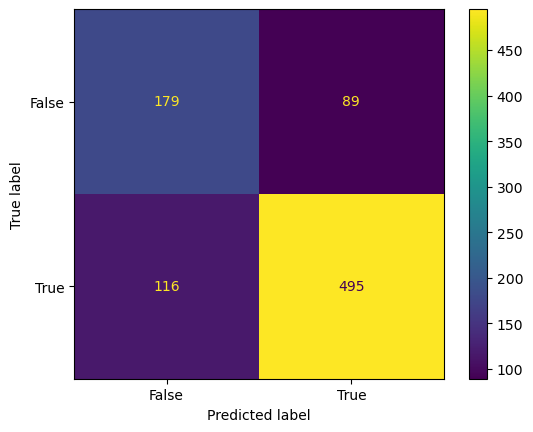

True Negative: 179
False Positive: 89
False Negative: 116
True Positive: 495


In [68]:
lg_model = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
lg_model.fit(X_train, y_train)
print("Model - Logistic Regression")

score = lg_model.score(X_train, y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, y_test)
print('accuracy test score overall :', score)

y_pred_log=dtree.predict(X_test)
result_dict["Logistic"]=metric_calssifcation(y_pred_log,y_test)

## 4.3 GaussianNB

Model-GaussianNB
train score 0.7453044963005122
test score 0.7235494880546075
Accuracy: 74.97
F1 Score: 0.83
Precision: 0.79
Recall: 0.87


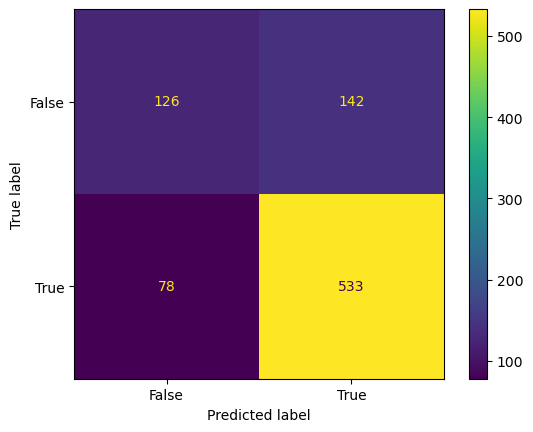

True Negative: 126
False Positive: 142
False Negative: 78
True Positive: 533


In [69]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
print("Model-GaussianNB")

print("train score",gnb_model.score(X_train,y_train))
print("test score",gnb_model.score(X_test,y_test))

y_pred = lg_model.predict(X_test)
result_dict["Naive Bayes"]=metric_calssifcation(y_pred,y_test)

## 4.4 K-Nearest Neighbors (kNN) classifier 

Model -KNN Classifier
Train Accuracy: 0.7885600455321571
Test Accuracy: 0.6951080773606371
Accuracy: 69.51
F1 Score: 0.79
Precision: 0.77
Recall: 0.81


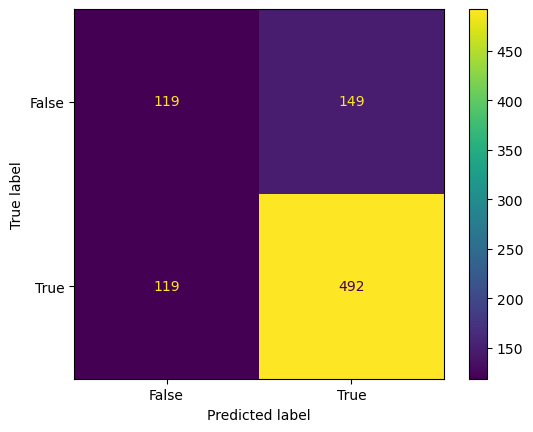

True Negative: 119
False Positive: 149
False Negative: 119
True Positive: 492


In [70]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)
print("Model -KNN Classifier")

# Predict the labels for the test set
y_pred = knn_classifier.predict(X_train)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the labels for the test set
y_pred = knn_classifier.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

y_pred = knn_classifier.predict(X_test)
result_dict["KNN"]=metric_calssifcation(y_pred,y_test)

## 4.5 Random Forest

Model- Random Forest Tree
train score: 0.8292544109277177
test score: 0.8134243458475541
Accuracy: 81.34
F1 Score: 0.87
Precision: 0.85
Recall: 0.88


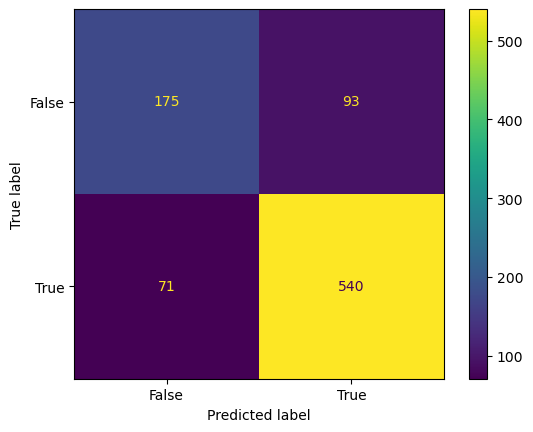

True Negative: 175
False Positive: 93
False Negative: 71
True Positive: 540


In [71]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, y_test)
print(f"test score: {accuracy}")

y_pred = rf_clf.predict(X_test)
result_dict["Random Forest"]=metric_calssifcation(y_pred,y_test)

In [72]:
result=pd.DataFrame(result_dict,index=["acc","f1","precision","recal"])
result

,dt,Logistic,Naive Bayes,KNN,Random Forest
acc,76.91,76.68,74.97,69.51,81.34
f1,0.83,0.83,0.83,0.79,0.87
precision,0.85,0.85,0.79,0.77,0.85
recal,0.81,0.81,0.87,0.81,0.88


# GridSearchCV - DT

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0}


# GridSearchCV - Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200, 'random_state': 42}


# GridSearchCV- XGBoost Classifier

In [75]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
